# Software blinding test for Muon g-2 experiment

## 1. Import some important libraries here

In [2]:
import math,sys
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
sys.path.append("/usr/local/Cellar/root/6.16.00_3/lib/root")
import ROOT as r
r.gROOT.Macro( '~/rootlogon.C' ) #if you have a rootlogon.C
r.gStyle.SetOptFit(1111)
c = r.TCanvas('c1','c1',1200,600)

OSError: dlopen(Blinding/libBlinders.so, 6): image not found

## 2. Get the g-2 blinder here

In [8]:
# unblinded fit, only do this before going to Elba, Italy 2018
#myBlinder = Blinders(FitType.Omega_a) # or Blinder(FitType.Omega_p)

# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'EDM time!')

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


## 3. Create your own blinded wiggle function

In [9]:
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

## 4. Read some real data here

In [10]:
cluster_tree = r.TChain('clusterTree/clusters') # using the output of gm2calo::ClusterTree analyzer
cluster_tree.Add('gm2offline_example.root')

1

## 5. Make a wiggle plot

In [11]:
cluster_tree.Draw('time*1.25/1000>>wiggle(2000,0,300)','energy>1800 && energy < 10000','goff')
wiggle = r.gDirectory.Get('wiggle')

## 6. Set some initial parameters and name them

In [12]:
func = r.TF1("func", blinded_wiggle, 30,280,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(1500,64.4,0.4,0,0)
func.SetLineColor(2)
func.SetNpx(1000)

## 7. Here comes our blinded fit!

 FCN=1522.67 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         691 TOTAL
                     EDM=1.07837e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            4.77169e+01   9.26597e-01  -6.61074e-03   5.66466e-05
   2  #tau         6.15944e+01   7.56316e-01   2.19822e-03   3.66381e-05
   3  A            4.11839e-01   1.22284e-02  -1.74003e-04   2.80325e-03
   4  R           -9.79733e+01   4.83803e+02   3.21885e-01   6.50738e-07
   5  #phi        -1.12799e+00   6.68645e-02   6.68645e-02   1.17407e-02


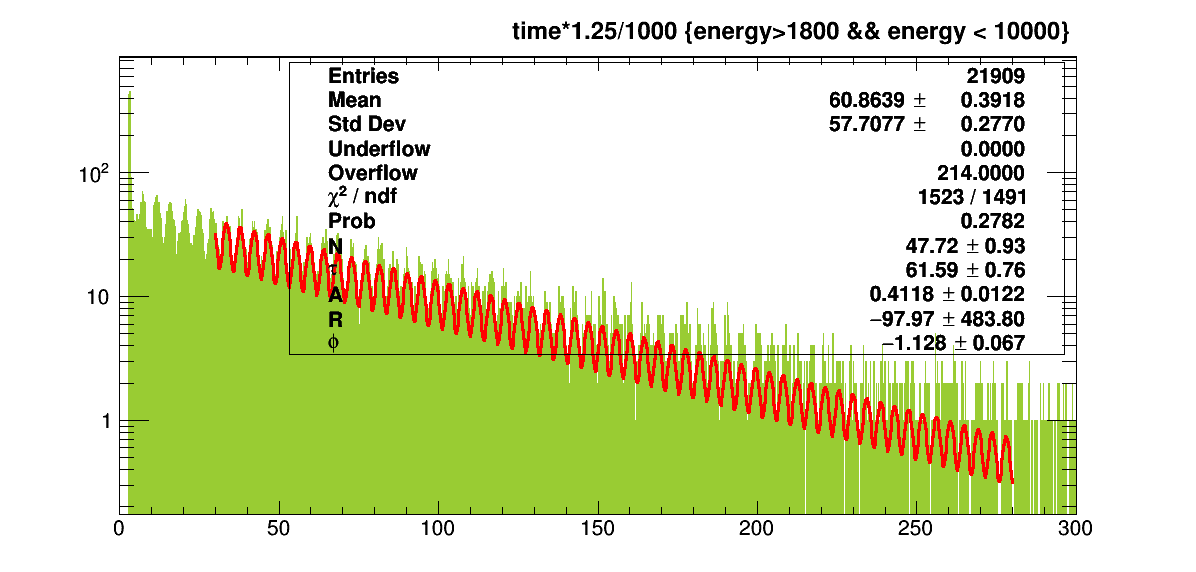

In [13]:
wiggle.Draw()
wiggle.Fit('func','REM')
c.Draw()
c.SetLogy()